# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Building-an-ANN" data-toc-modified-id="Building-an-ANN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Building an ANN</a></div><div class="lev2 toc-item"><a href="#Installing-packages" data-toc-modified-id="Installing-packages-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing packages</a></div><div class="lev2 toc-item"><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preprocessing</a></div><div class="lev2 toc-item"><a href="#Building-an-ANN" data-toc-modified-id="Building-an-ANN-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Building an ANN</a></div><div class="lev2 toc-item"><a href="#Making-predictions-and-evaluating-the-model" data-toc-modified-id="Making-predictions-and-evaluating-the-model-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Making predictions and evaluating the model</a></div><div class="lev2 toc-item"><a href="#Evaluating,-Improving-and-Tuning-the-ANN" data-toc-modified-id="Evaluating,-Improving-and-Tuning-the-ANN-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Evaluating, Improving and Tuning the ANN</a></div>

# Building an ANN

## Installing packages

In [36]:
# Installing Tensorflow
# !pip install tensorflow

# Installing Keras
# !pip install --upgrade keras

## Data Preprocessing

In [64]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./dataset.csv')

In [48]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=dataset)

In [49]:
# !pip install ctgan

In [50]:
from sdv.single_table import CTGANSynthesizer

# Step 1: Create the synthesizer
synthesizer = CTGANSynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(dataset)

# Step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=500)

/home/sheron/.local/lib/python3.10/site-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'max_delta'. Data will not be rounded.
  warnings.warn(
/home/sheron/.local/lib/python3.10/site-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'min_delta'. Data will not be rounded.
  warnings.warn(
/home/sheron/.local/lib/python3.10/site-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'avg_delta'. Data will not be rounded.
  warnings.warn(
/home/sheron/.local/lib/python3.10/site-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'max_dio_delta'. Data will not be rounded.
  warnings.warn(
/home/sheron/.local/lib/python3.10/site-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'min_dio_delta'. Data will not be rounded.
  warnings.warn(
/home/sheron/.local/lib/python3.

- y (actual value): exited, this is the value we are trying to predict, which means if the customer stays or exit the bank.

In [51]:
dataset = synthetic_data.copy()

In [65]:
y = dataset["attack_type"]
dataset = dataset.drop("attack_type", axis=1)
X = dataset

In [66]:
print (X.shape)
X

(160, 23)


,max_len,min_len,avg_len,num_msgs,max_delta,min_delta,avg_delta,num_dio,num_dis,num_dao,...,max_dis_delta,min_dis_delta,avg_dis_delta,max_dao_delta,min_dao_delta,avg_dao_delta,num_collision_drops,num_neigh_alloc_drops,num_queue_drops,num_packetn_drops
0,104,5,76.125579,53559,7.259822,-0.003161,0.002219,740874,904,740874,...,1.324308,0.000043,0.004402,267.339196,-0.000006,0.004851,11010,19313,108,233
1,104,5,77.334942,38113,4.370482,-0.003056,0.002273,267916,323961,267916,...,590.690323,-0.000005,0.011108,36.630923,-0.000004,0.013411,4916,2719,136,262
2,104,5,70.737081,9933,6.691949,-0.002818,0.037770,25999,912,25999,...,27.643703,0.000042,0.037567,513.903298,-0.000003,0.137469,77,10,0,0
3,104,5,75.004308,57539,4.784042,-0.002938,0.001653,963149,935,963149,...,9.537688,0.000002,0.014346,152.826806,-0.000008,0.003731,12499,14902,48,155
4,104,5,71.375565,9249,8.903116,-0.002903,0.037106,27350,880,27350,...,2.687711,0.000004,0.007451,566.962138,-0.000006,0.115117,118,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,104,5,66.688519,49614,7.163422,-0.003168,0.019756,22176,1406,22176,...,6.131030,0.000059,0.020672,112.788138,0.000002,0.161344,51,62,20,10
156,104,5,73.546779,34412,6.017805,-0.003159,0.007334,93980,121464,93980,...,41.844221,0.000023,0.029622,40.644700,-0.000004,0.038232,78,11,36,24
157,104,5,79.946225,50627,4.681070,-0.003162,0.003804,313817,1406,313817,...,4.566566,0.000023,0.020672,52.591196,-0.000007,0.011452,1563,10988,154,323
158,104,5,65.095894,31649,6.692650,-0.003148,0.029780,12064,1269,12064,...,7.566564,0.000012,0.024830,495.419391,0.000007,0.296675,5,0,6,3


In [67]:
print (y.shape)
y

(160,)


0      VersionNumberAttack
1         HelloFloodAttack
2                 NoAttack
3      VersionNumberAttack
4                 NoAttack
              ...         
155      WorstParentAttack
156       HelloFloodAttack
157    VersionNumberAttack
158      WorstParentAttack
159               NoAttack
Name: attack_type, Length: 160, dtype: object

In [68]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [69]:
print (X.shape)
X

(160, 23)


,max_len,min_len,avg_len,num_msgs,max_delta,min_delta,avg_delta,num_dio,num_dis,num_dao,...,max_dis_delta,min_dis_delta,avg_dis_delta,max_dao_delta,min_dao_delta,avg_dao_delta,num_collision_drops,num_neigh_alloc_drops,num_queue_drops,num_packetn_drops
0,104,5,76.125579,53559,7.259822,-0.003161,0.002219,740874,904,740874,...,1.324308,0.000043,0.004402,267.339196,-0.000006,0.004851,11010,19313,108,233
1,104,5,77.334942,38113,4.370482,-0.003056,0.002273,267916,323961,267916,...,590.690323,-0.000005,0.011108,36.630923,-0.000004,0.013411,4916,2719,136,262
2,104,5,70.737081,9933,6.691949,-0.002818,0.037770,25999,912,25999,...,27.643703,0.000042,0.037567,513.903298,-0.000003,0.137469,77,10,0,0
3,104,5,75.004308,57539,4.784042,-0.002938,0.001653,963149,935,963149,...,9.537688,0.000002,0.014346,152.826806,-0.000008,0.003731,12499,14902,48,155
4,104,5,71.375565,9249,8.903116,-0.002903,0.037106,27350,880,27350,...,2.687711,0.000004,0.007451,566.962138,-0.000006,0.115117,118,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,104,5,66.688519,49614,7.163422,-0.003168,0.019756,22176,1406,22176,...,6.131030,0.000059,0.020672,112.788138,0.000002,0.161344,51,62,20,10
156,104,5,73.546779,34412,6.017805,-0.003159,0.007334,93980,121464,93980,...,41.844221,0.000023,0.029622,40.644700,-0.000004,0.038232,78,11,36,24
157,104,5,79.946225,50627,4.681070,-0.003162,0.003804,313817,1406,313817,...,4.566566,0.000023,0.020672,52.591196,-0.000007,0.011452,1563,10988,154,323
158,104,5,65.095894,31649,6.692650,-0.003148,0.029780,12064,1269,12064,...,7.566564,0.000012,0.024830,495.419391,0.000007,0.296675,5,0,6,3


In [70]:
print (y.shape)
y

(160,)


array([2, 0, 1, 2, 1, 2, 0, 3, 3, 2, 0, 2, 1, 0, 0, 0, 0, 3, 2, 3, 0, 3,
       1, 1, 3, 1, 0, 2, 3, 0, 1, 0, 1, 0, 2, 2, 3, 0, 1, 3, 1, 2, 2, 3,
       2, 3, 1, 0, 3, 0, 2, 0, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 2, 2, 1, 3,
       2, 2, 0, 2, 1, 0, 1, 3, 2, 3, 0, 2, 3, 1, 2, 0, 1, 2, 1, 2, 0, 3,
       3, 2, 0, 2, 1, 0, 0, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 0, 2, 3, 0,
       1, 0, 1, 0, 2, 2, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3, 1, 0, 3, 0, 2, 0,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 2, 2, 1, 3, 2, 2, 0, 2, 1, 0, 1, 3,
       2, 3, 0, 2, 3, 1])

In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building an ANN

In [111]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [124]:
# Initialising the ANN
classifier = Sequential()

In [125]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 32, activation = 'tanh', input_dim = 23))
classifier.add(Dropout(rate=0.5))
# Adding the second hidden layer
classifier.add(Dense(units = 16, activation = 'tanh'))
classifier.add(Dropout(rate=0.5))
# Adding the third hidden layer
classifier.add(Dense(units = 32, activation = 'tanh'))
classifier.add(Dropout(rate=0.5))
# Adding the fourth hidden layer
classifier.add(Dense(units = 16, activation = 'tanh'))
classifier.add(Dropout(rate=0.5))
# Adding the fifth hidden layer
classifier.add(Dense(units = 8, activation = 'tanh'))
classifier.add(Dropout(rate=0.5))
# Adding the output layer
classifier.add(Dense(units = 4, activation = 'softmax'))

In [126]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
128/128 [==============================] - 1s 1ms/step - loss: 1.6990 - accuracy: 0.2891
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 1.4764 - accuracy: 0.3203
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 1.4450 - accuracy: 0.3203
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 1.4904 - accuracy: 0.3672
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 1.3121 - accuracy: 0.3984
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 1.3932 - accuracy: 0.3438
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 1.2994 - accuracy: 0.3672
Epoch 8/100
128/128 [==============================] - 0s 1ms/step - loss: 1.1829 - accuracy: 0.4922
Epoch 9/100
128/128 [==============================] - 0s 1ms/step - loss: 1.1559 - accuracy: 0.5000
Epoch 10/100
128/128 [==============================] - 0s 1ms/step - loss: 1.2765 - accura

128/128 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8438
Epoch 82/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.7969
Epoch 83/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.7891
Epoch 84/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.8203
Epoch 85/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.8438
Epoch 86/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8203
Epoch 87/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8672
Epoch 88/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8516
Epoch 89/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8516
Epoch 90/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 

In [127]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                768       
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dropout_36 (Dropout)        (None, 16)                0         
                                                                 
 dense_44 (Dense)            (None, 32)                544       
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 16)               

## Making predictions and evaluating the model

In [128]:
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 53ms/step


In [129]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3])

In [130]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'HelloFloodAttack': 0, 'NoAttack': 1, 'VersionNumberAttack': 2, 'WorstParentAttack': 3}


In [131]:
cm

array([[8, 0, 0, 0],
       [0, 7, 0, 1],
       [0, 0, 8, 0],
       [0, 1, 0, 7]])

In [132]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9375


In [133]:
y_pred

array([3, 2, 1, 1, 1, 2, 2, 1, 0, 1, 3, 1, 0, 2, 2, 0, 3, 3, 3, 3, 0, 2,
       1, 2, 3, 3, 1, 0, 2, 0, 0, 0])

In [134]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, classes, ymap=None, figsize=(17,17)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      classes:   aliases for the labels. String array to be shown in the cm plot.
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    sns.set(font_scale=2.8)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
            #elif c == 0:
            #    annot[i, j] = ''
            else:
                annot[i, j] = '%.2f%%\n%d' % (p, c)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm = cm * 100
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    fig, ax = plt.subplots(figsize=figsize)
    plt.yticks(va='center')

    sns.heatmap(cm, annot=annot, fmt='', ax=ax, xticklabels=classes, cbar=True, cbar_kws={'format':PercentFormatter()}, yticklabels=classes, cmap="Blues")
    plt.savefig(filename,  bbox_inches='tight')

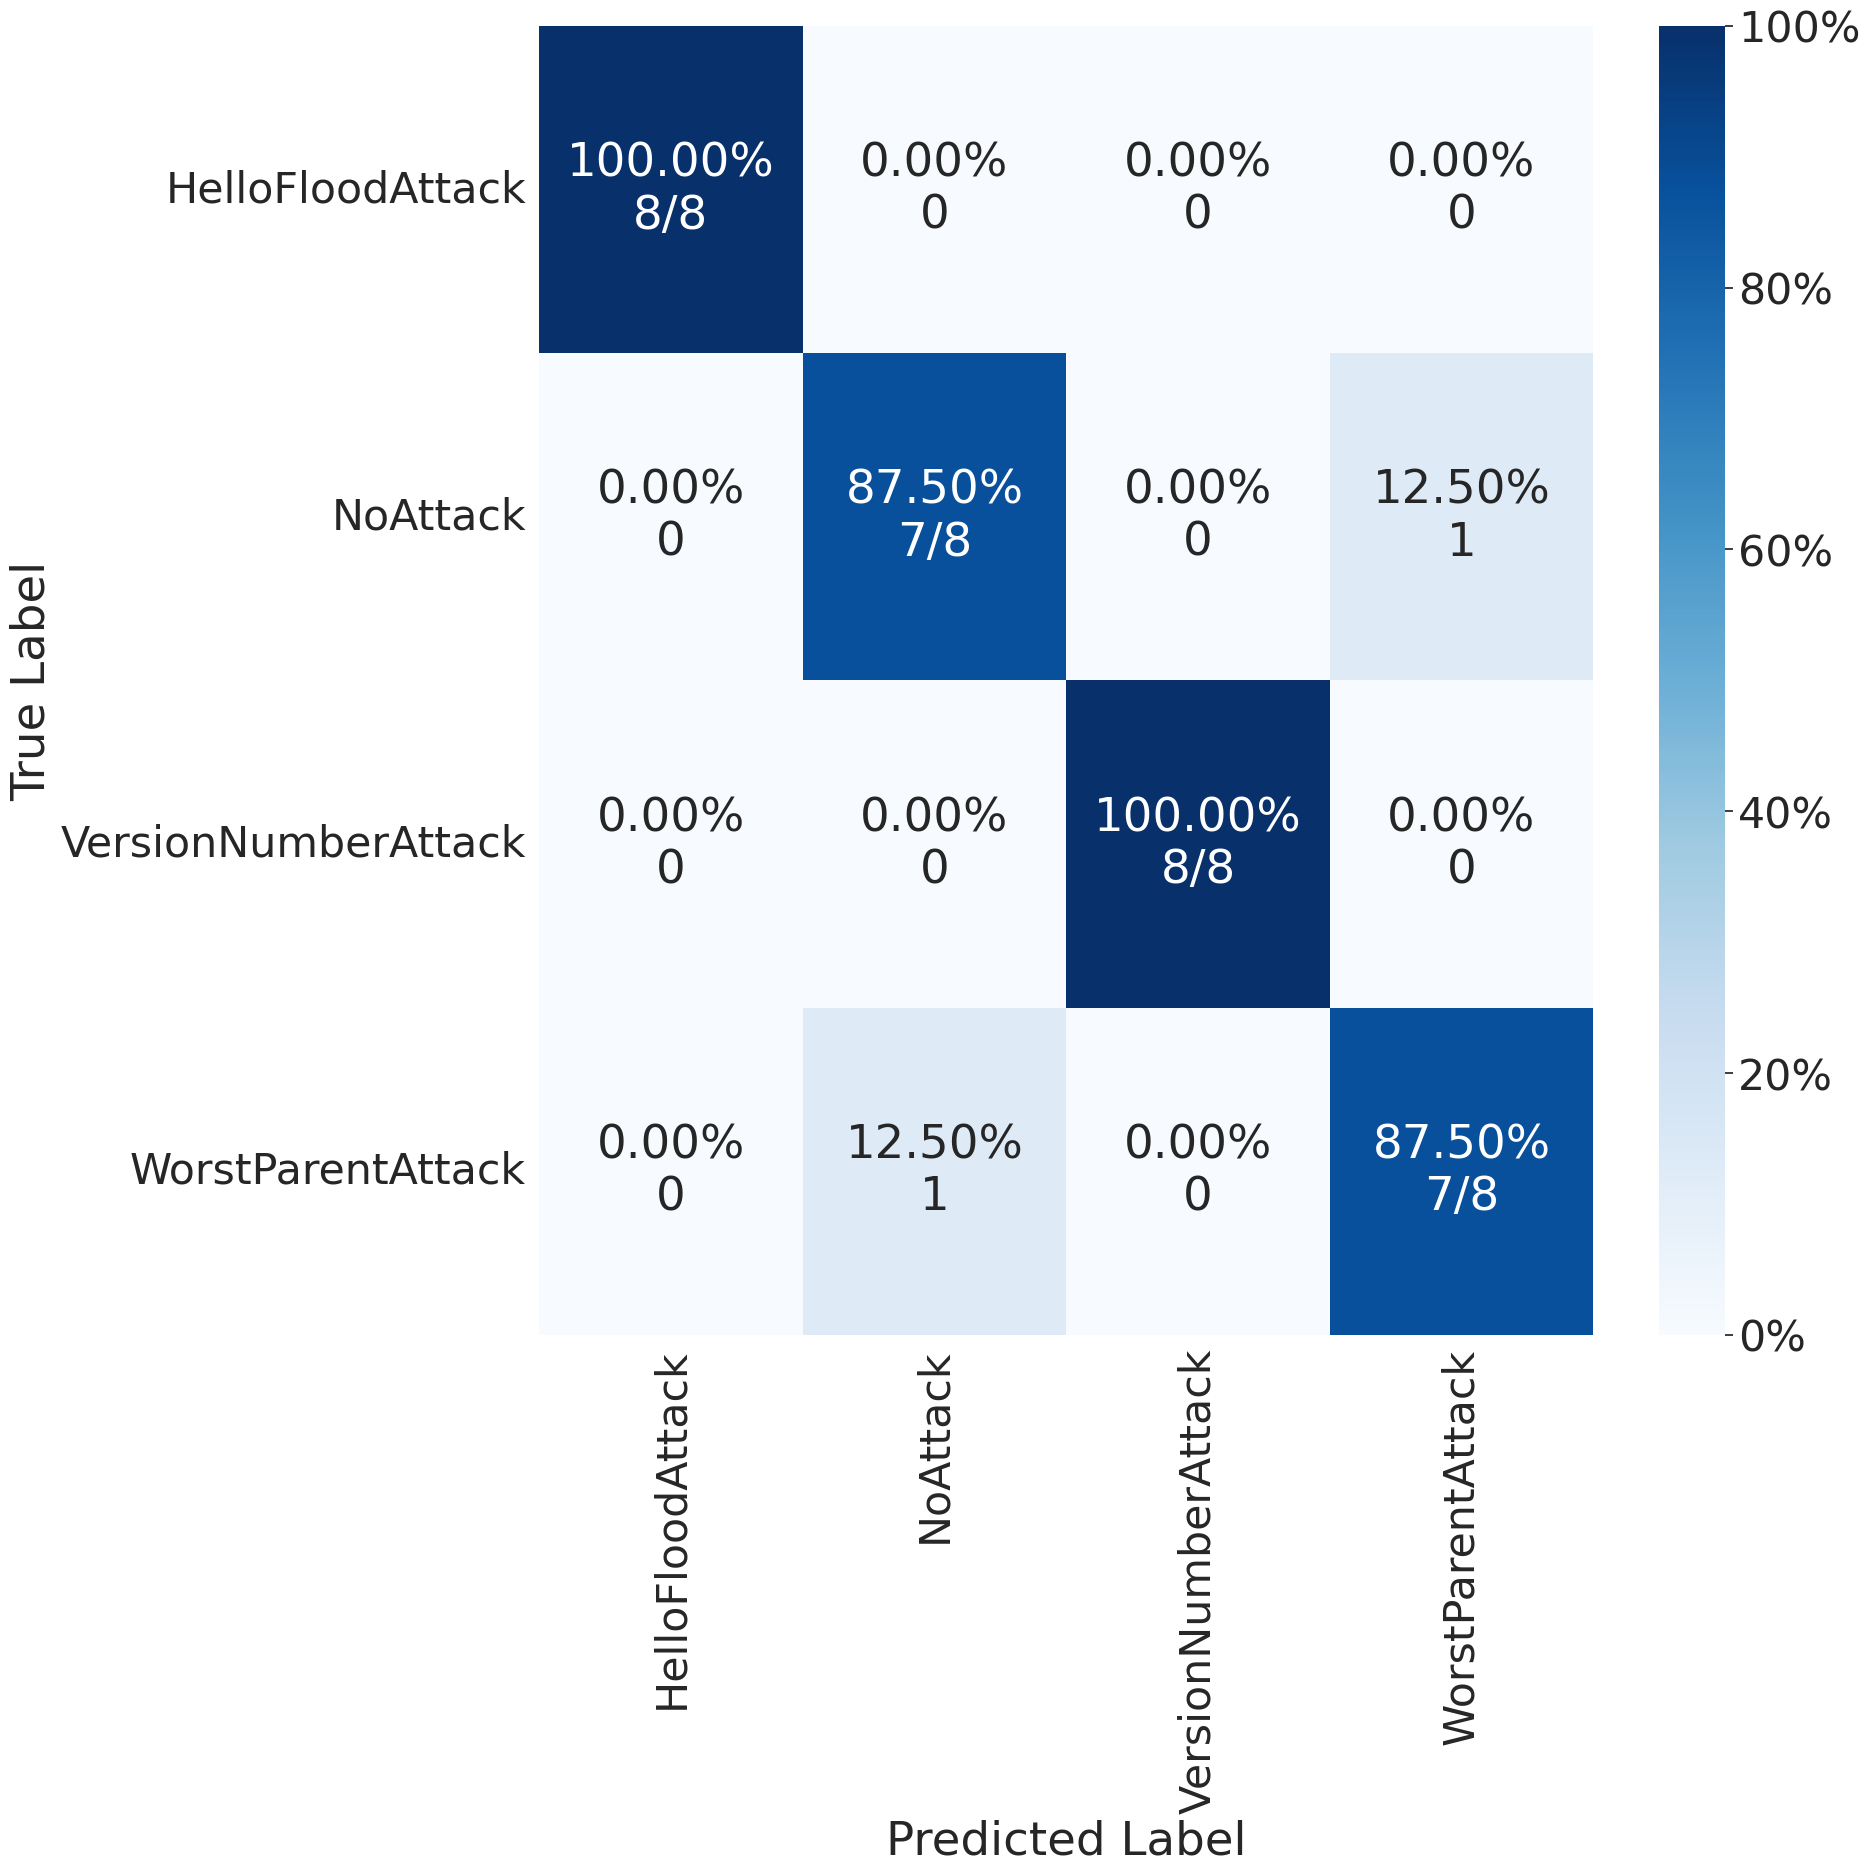

In [135]:
cm_analysis(y_test, y_pred, "filename.jpg", [0, 1, 2, 3], le.classes_)

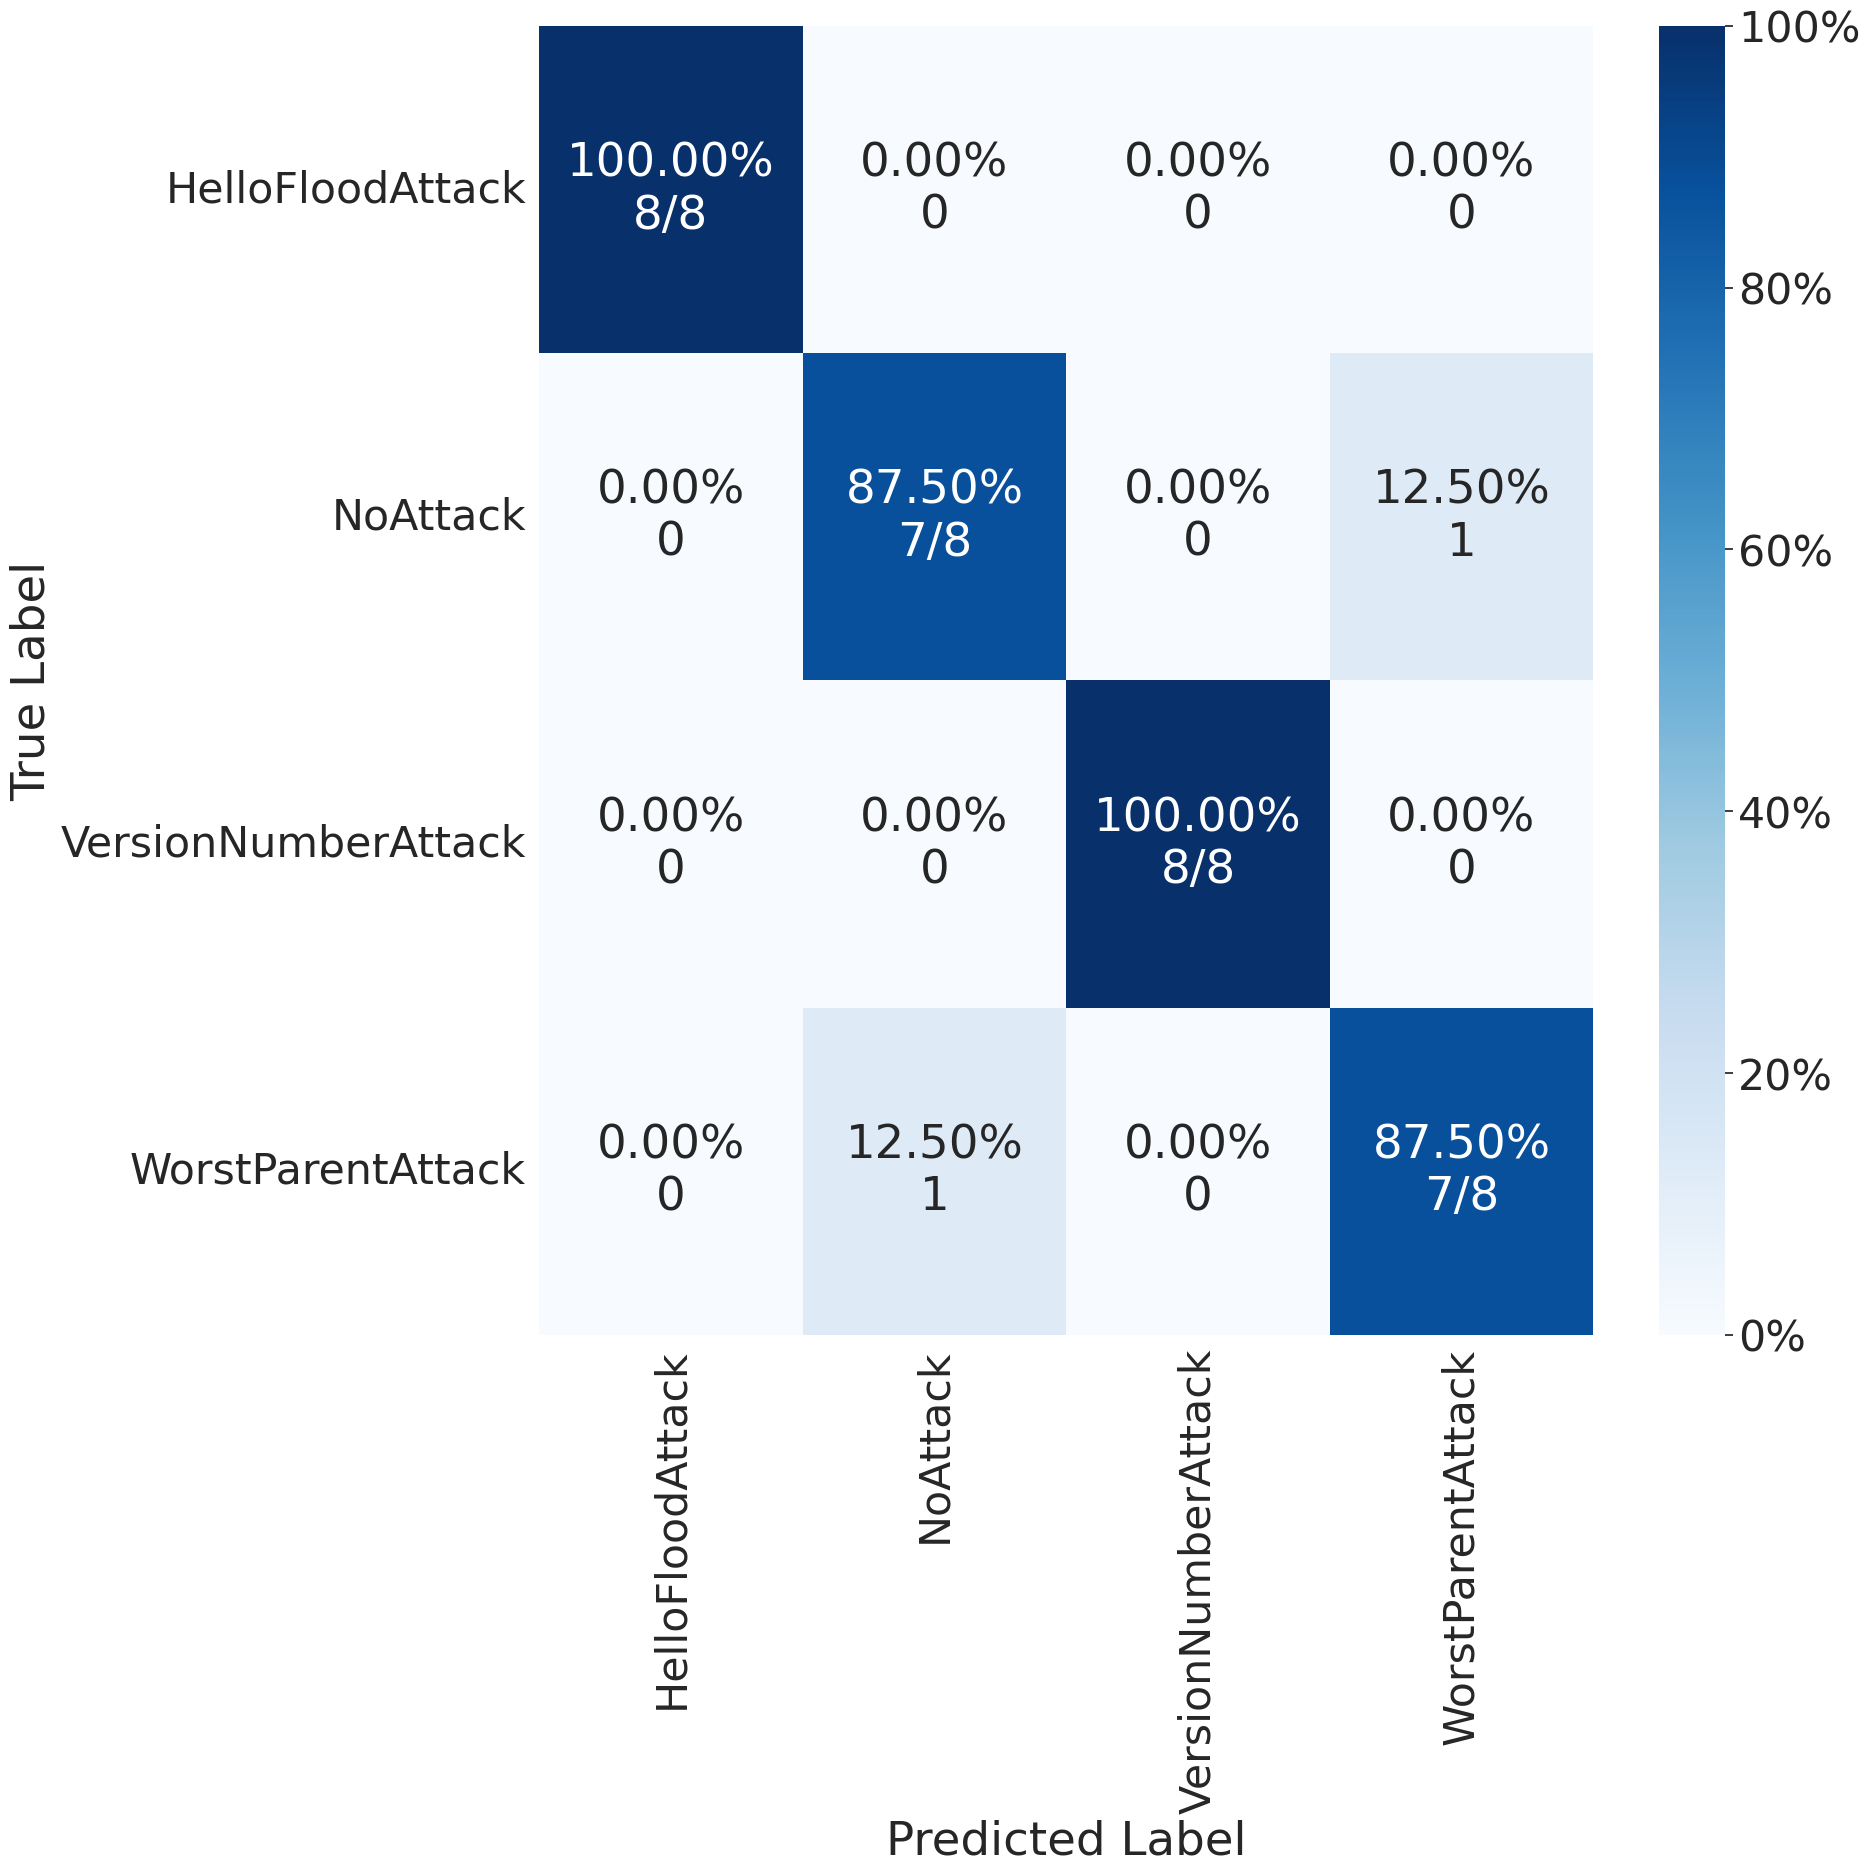

In [110]:
cm_analysis(y_test, y_pred, "filename.jpg", [0, 1, 2, 3], le.classes_)

## Evaluating, Improving and Tuning the ANN
- Using K-Fold Cross validation with Keras

In [ ]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def build_classifier(optimizer):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 23))
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    # Adding the third hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    # Adding the fourth hidden layer
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    # Adding the fifth hidden layer
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

* __Drop out regularization__: A solution for overfitting - high variance
    * At each iteration of training, some neurons of your artificial neural network are randomly disabled to prevent them from being too dependent on each other when they learn the correlations 
    * Therefore, by overwriting these neurons, the ANN learn several independent correlations in the data because each time there is not the same configuration of the neurons.
    * The fact that we get these independent correlations of the data, meaning the neurons work more independently, that prevents the neuron from learning too much and therefore overfitting.

- Using Dropout() argument:
    - `p`: the fraction of the input units you want to drop/disable at each iteration. For example: if we have 10 neurons, p=0.1 (10%), this means at each iteration, 1 neuron will be disabled.